### TorchVision을 이용한 데이터 증강

In [1]:
# 패키지 임포트
from PIL import Image
import time
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
from matplotlib import pyplot as plt
import cv2
import numpy as np

import cv2 : 컴퓨터 비전 및 이미지 처리와 관련된 다양한 고급 기능을 제공하는 오픈 소스 라이브러리

cv2는 OpenCV 라이브러리의 파이썬에서 사용되는 네임스페이스(namespace) 또는 별칭(alias), cv2.함수명() 형태로 OpenCV의 다양한 함수와 기능에 접근 가능

### 이미지 데이터 다운로드

In [2]:
# 이미지 데이터 다운로드
!wget https://raw.githubusercontent.com/jetsonai/DeepLearning4Projects/master/Chap3/data.zip

--2024-03-21 03:31:32--  https://raw.githubusercontent.com/jetsonai/DeepLearning4Projects/master/Chap3/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17251 (17K) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  16.85K  --.-KB/s    in 0s      

2024-03-21 03:31:32 (108 MB/s) - ‘data.zip’ saved [17251/17251]



In [3]:
#zip 파일 압축풀기
!unzip data.zip -d data

Archive:  data.zip
  inflating: data/cat_2.jpg          


./data/cat_2.jpg


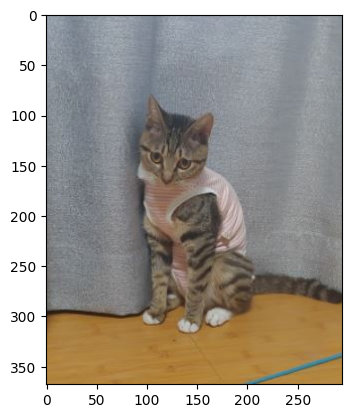

In [4]:
# 이미지 보기
def cv_image_read(image_path):
    print(image_path)
    return cv2.imread(image_path)

def show_image(cv_image):
    rgb = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(rgb)
    plt.show()

show_image(cv_image_read('./data/cat_2.jpg'))

 이미지의 경로(image_path) 출력하기

 cv2.cvtColor() 함수를 사용하여 이미지의 컬러 포맷을 BGR에서 RGB로 변환

 matplotlib는 RGB 포맷을 사용하기 때문에, OpenCV로 읽어온 이미지를 matplotlib를 통해 올바르게 표시하기 위해 이 변환이 필요

 plt.figure()를 호출하여 새로운 그림 창을 생성

 plt.imshow(rgb)를 사용하여 변환된 RGB 이미지를 표시

In [5]:
# Torchvision 데이터세트 클래스
class TorchvisionDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]
        # 이미지 읽기
        image = Image.open(file_path)
        # 이미지 변경 수행
        if self.transform:
            image = self.transform(image)
        return image, label

transform: 이미지에 적용할 변환(transform), 기본값은 None,주로 데이터 증강(augmentation)이나 전처리를 위해 사용

주어진 인덱스에 해당하는 레이블을 labels 리스트에서 가져온다.

주어진 인덱스에 해당하는 이미지 파일의 경로를 file_paths 리스트에서 가져온다.

self.transform이 None이 아니라면, 즉 변환 함수가 제공되었다면, 이 변환을 이미지에 적용

변환된 이미지와 해당 이미지의 레이블을 튜플 형태로 반환

In [6]:
# Torchvision 이미지 변형 (사이즈 변경, 자르기, 수평 뒤집기)
torchvision_transform = transforms.Compose([
    transforms.Resize((220, 220)),
    transforms.RandomCrop(120),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])
# TorchvisionDataset 클래스 객체 생성
torchvision_dataset = TorchvisionDataset(
    file_paths=['./data/cat_2.jpg'],
    labels=[1],
    transform=torchvision_transform,
)

transforms.Compose([...]): 이 함수는 여러 변환(transform)을 하나로 결합하여 순차적으로 적용

모든 이미지를 220x220 크기로 조정(resize)

이미지에서 무작위로 120x120 크기의 부분을 잘라냅니다(crop)

일정 확률로 이미지를 수평 방향으로 뒤집습니다(flip). 이는 데이터의 다양성을 늘려 모델의 일반화 능력을 향상

이미지 데이터를 파이토치 텐서로 변환. 또한, 이미지의 픽셀 값 범위를 [0, 255]에서 [0.0, 1.0]으로 스케일링

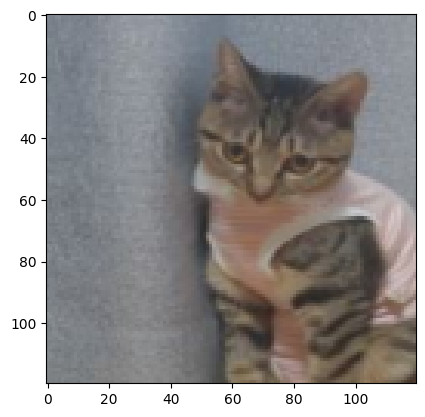

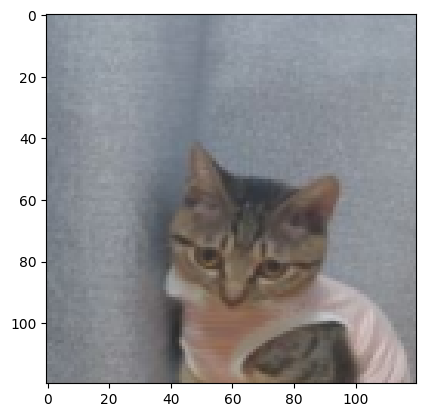

In [7]:
# 랜덤으로 2번 변형 수행
for i in range(2):
  sample, _= torchvision_dataset[0]
  plt.figure()
  plt.imshow(transforms.ToPILImage()(sample))
  plt.show()

첫 번째 샘플(이미지)을 두 번 반복하여 가져와서, matplotlib를 사용하여 화면에 표시하는 과정

레이블은 사용하지 않으므로 _로 무시

transforms.ToPILImage()는 PyTorch 텐서를 PIL 이미지 객체로 변환하는 변환

plt.imshow()는 PIL 이미지나 넘파이 배열을 입력으로 받을 수 있다.

동일한 원본 이미지에 대해 무작위로 적용된 변환의 결과로 서로 다르게 보일 수 있다.

### Albumentations 패키지를 이용한 데이터 증강

In [8]:
import albumentations
import albumentations.pytorch

albumentations은 이미지 데이터에 대해 다양한 변환(augmentation)을 적용할 수 있는 파이썬 라이브러리

데이터의 다양성을 늘리기 위해 사용

In [9]:
# Albumentations 데이터세트 클래스
class AlbumentationsDataset(Dataset):
    """__init__ and __len__ functions are the same as in TorchvisionDataset"""
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]
        # 이미지 읽기
        image = cv2.imread(file_path)
        # BGR opencv 이미지를 RGB 이미지로 변경
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # 이미지 변경 수행
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        return image, label

OpenCV는 이미지를 BGR 포맷으로 읽어오기 때문에, cv2.cvtColor 함수를 사용하여 RGB 포맷으로 변환

albumentations 라이브러리는 변환을 적용한 결과를 딕셔너리 형태로 반환하므로, 변환된 이미지를 딕셔너리에서 추출

In [10]:
# albumentations 이미지 변형 (사이즈 변경, 자르기, 90도 회전, 수평 뒤집기, 가우시안 노이즈)
albumentations_transform = albumentations.Compose([
    albumentations.Resize(220, 220),
    albumentations.RandomCrop(120, 120),
    albumentations.RandomRotate90(p=1),
    albumentations.HorizontalFlip(),
    albumentations.GaussNoise(p=1),
    albumentations.pytorch.transforms.ToTensorV2()
])
#AlbumentationsDataset 클래스 객체 생성
albumentations_dataset = AlbumentationsDataset(
    file_paths=['./data/cat_2.jpg'],
    labels=[1],
    transform=albumentations_transform,
)

이미지의 크기를 220x220으로 조정(resize)

이미지에서 120x120 크기의 무작위 영역을 잘라내(crop)어 이미지의 일부분만 사용

이미지를 90도 단위로 무작위로 회전(rotate). p=1은 이 변환을 항상 적용함을 의미

수평 방향으로 뒤집는(flipping) 변환. 이 변환은 기본적으로 50%의 확률로 적용

이미지에 가우스(Gaussian) 노이즈를 추가. p=1은 이 변환을 항상 적용함을 의미

이미지 데이터를 PyTorch 텐서로 변환하고, 적절한 데이터 타입으로 변경. 또한, 이미지의 색상 채널을 [0, 1] 범위로 정규화

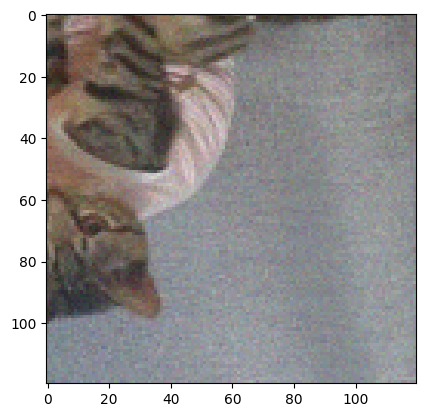

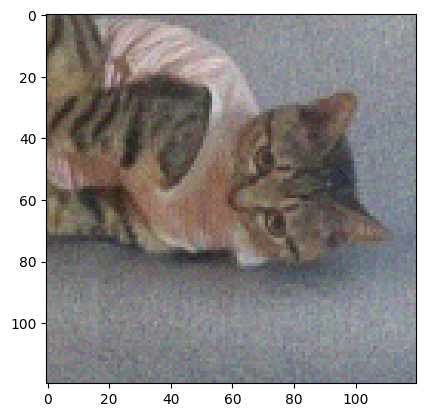

In [11]:
# 랜덤으로 2번 변형 수행
for i in range(2):
  sample, _ = albumentations_dataset[0]

  plt.figure()
  plt.imshow(transforms.ToPILImage()(sample))
  plt.show()